# Simple Average Ensemble (A Ensemble)

✅ Simple Average Ensemble - Accuracy: 0.8529, F1 Score: 0.8523


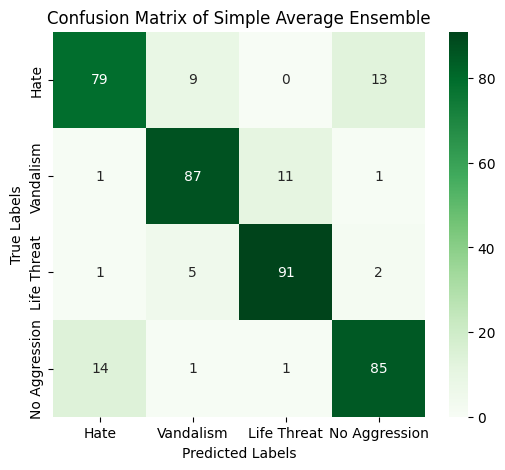


Classification Report:
                precision    recall  f1-score   support

         Hate     0.8316    0.7822    0.8061       101
    Vandalism     0.8529    0.8700    0.8614       100
  Life Threat     0.8835    0.9192    0.9010        99
No Aggression     0.8416    0.8416    0.8416       101

     accuracy                         0.8529       401
    macro avg     0.8524    0.8532    0.8525       401
 weighted avg     0.8522    0.8529    0.8523       401


Accuracy Per Class:
Hate: 0.7822
Vandalism: 0.8700
Life Threat: 0.9192
No Aggression: 0.8416

✅ Overall Test Accuracy: 0.8529
✅ Overall Test Precision: 0.8524
✅ Overall Test Recall: 0.8532
✅ Overall Test F1 Score: 0.8525
✅ Weighted F1 Score: 0.8523
✅ Error Rate: 0.1471


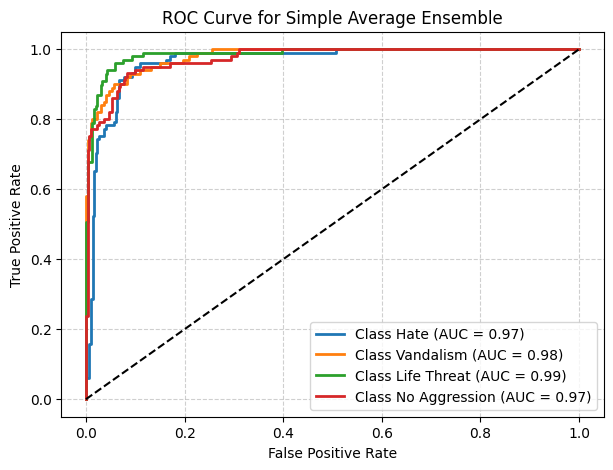

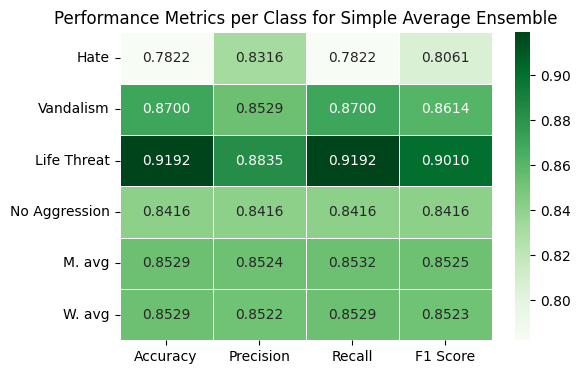

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,
    ConfusionMatrixDisplay, classification_report, roc_curve, auc
)
from sklearn.model_selection import train_test_split

# ✅ Load Predictions from Both Models
banglabert_df = pd.read_csv("/content/xlm_roberta_baseline_predictions.csv")
xlm_roberta_df = pd.read_csv("/content/banglabert_baseline_predictions.csv")

# ✅ Ensure both have the same true labels
assert np.array_equal(banglabert_df["y_true"], xlm_roberta_df["y_true"]), "Mismatch in true labels!"

# ✅ Extract True Labels and Probabilities
y_true = banglabert_df["y_true"]

# Extract probabilities for all classes from both models
banglabert_probs = banglabert_df.iloc[:, 1:].values  # Model 1 probabilities
xlm_roberta_probs = xlm_roberta_df.iloc[:, 1:].values  # Model 2 probabilities

# ✅ Compute Simple Average Ensemble Probabilities
ensemble_probs = (banglabert_probs + xlm_roberta_probs) / 2

# ✅ Compute Final Predictions
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# ✅ Evaluate Performance
ensemble_acc = accuracy_score(y_true, ensemble_preds)
ensemble_f1 = f1_score(y_true, ensemble_preds, average="weighted")
print(f"✅ Simple Average Ensemble - Accuracy: {ensemble_acc:.4f}, F1 Score: {ensemble_f1:.4f}")

# ✅ Define class labels
class_labels = ["Hate", "Vandalism", "Life Threat", "No Aggression"]

# ✅ Compute Confusion Matrix
cm = confusion_matrix(y_true, ensemble_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Simple Average Ensemble")
plt.show()

# ✅ Generate Classification Report
report = classification_report(y_true, ensemble_preds, target_names=class_labels, digits=4)
print("\nClassification Report:\n", report)

# ✅ Compute Accuracy Per Class
accuracy_per_class = []
for i in range(len(class_labels)):
    class_mask = (y_true == i)
    class_accuracy = accuracy_score(y_true[class_mask], ensemble_preds[class_mask])
    accuracy_per_class.append(class_accuracy)

# ✅ Print Accuracy per Class
print("\nAccuracy Per Class:")
for label, acc in zip(class_labels, accuracy_per_class):
    print(f"{label}: {acc:.4f}")

# ✅ Compute Overall Performance Metrics
precision = precision_score(y_true, ensemble_preds, average='macro')
recall = recall_score(y_true, ensemble_preds, average='macro')
f1 = f1_score(y_true, ensemble_preds, average='macro')
weighted_f1 = f1_score(y_true, ensemble_preds, average='weighted')
error_rate = 1 - ensemble_acc

print(f"\n✅ Overall Test Accuracy: {ensemble_acc:.4f}")
print(f"✅ Overall Test Precision: {precision:.4f}")
print(f"✅ Overall Test Recall: {recall:.4f}")
print(f"✅ Overall Test F1 Score: {f1:.4f}")
print(f"✅ Weighted F1 Score: {weighted_f1:.4f}")
print(f"✅ Error Rate: {error_rate:.4f}")

# ✅ Plot ROC Curve
plt.figure(figsize=(7, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true == i, ensemble_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})', linestyle='-', linewidth=2, color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Simple Average Ensemble")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ✅ Compute Metrics Per Class
precision_per_class = precision_score(y_true, ensemble_preds, average=None)
recall_per_class = recall_score(y_true, ensemble_preds, average=None)
f1_per_class = f1_score(y_true, ensemble_preds, average=None)

# ✅ Compute Macro and Weighted Averages
macro_avg = [ensemble_acc, precision, recall, f1]
weighted_avg = [ensemble_acc, precision_score(y_true, ensemble_preds, average='weighted'), recall_score(y_true, ensemble_preds, average='weighted'), weighted_f1]

# ✅ Create and Display 2D Metrics Matrix
metrics_df = pd.DataFrame(
    data=np.vstack([accuracy_per_class, precision_per_class, recall_per_class, f1_per_class]).T,
    index=class_labels,
    columns=["Accuracy", "Precision", "Recall", "F1 Score"]
)
metrics_df.loc["M. avg"] = macro_avg
metrics_df.loc["W. avg"] = weighted_avg

plt.figure(figsize=(6, 4))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="Greens", linewidths=0.5)
plt.title("Performance Metrics per Class for Simple Average Ensemble")
plt.show()


# Wighted Ensemble (W Ensemble)


✅ Weighted Ensemble - Accuracy: 0.8529, F1 Score: 0.8523


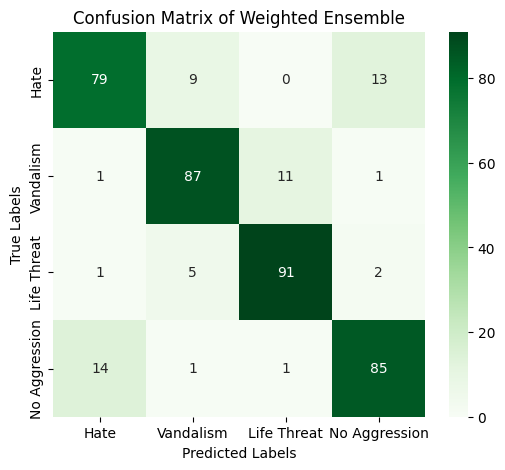


Classification Report:
                precision    recall  f1-score   support

         Hate     0.8316    0.7822    0.8061       101
    Vandalism     0.8529    0.8700    0.8614       100
  Life Threat     0.8835    0.9192    0.9010        99
No Aggression     0.8416    0.8416    0.8416       101

     accuracy                         0.8529       401
    macro avg     0.8524    0.8532    0.8525       401
 weighted avg     0.8522    0.8529    0.8523       401


Accuracy Per Class:
Hate: 0.7822
Vandalism: 0.8700
Life Threat: 0.9192
No Aggression: 0.8416

✅ Overall Test Accuracy: 0.8529
✅ Overall Test Precision: 0.8524
✅ Overall Test Recall: 0.8532
✅ Overall Test F1 Score: 0.8525
✅ Weighted F1 Score: 0.8523
✅ Error Rate: 0.1471


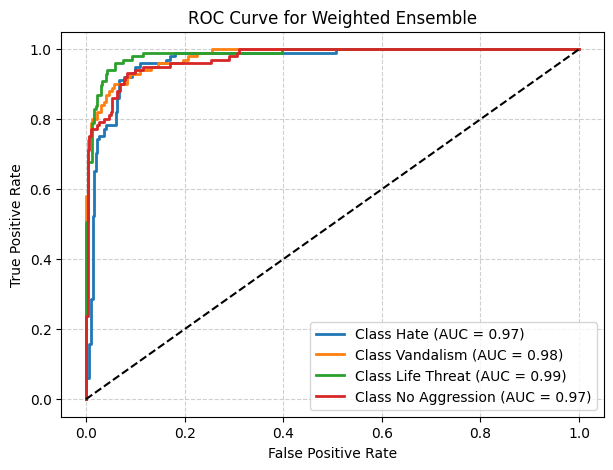

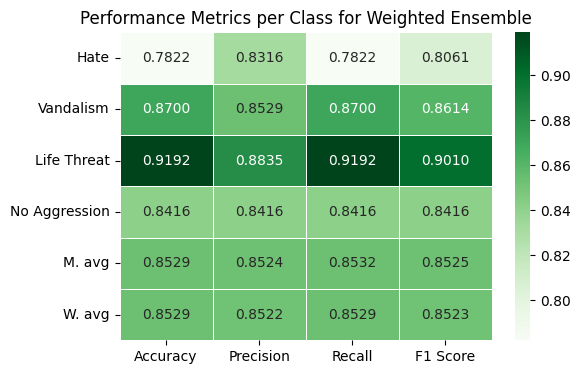

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,
    ConfusionMatrixDisplay, classification_report, roc_curve, auc
)
from sklearn.model_selection import train_test_split

# ✅ Load Predictions from Both Models
# banglabert_df = pd.read_csv("/content/banglabert_attention_predictions.csv")
# xlm_roberta_df = pd.read_csv("/content/xlm_roberta_attention_predictions (1).csv")

# ✅ Ensure both have the same true labels
assert np.array_equal(banglabert_df["y_true"], xlm_roberta_df["y_true"]), "Mismatch in true labels!"

# ✅ Extract True Labels and Probabilities
y_true = banglabert_df["y_true"]

# Extract probabilities for all classes from both models
banglabert_probs = banglabert_df.iloc[:, 1:].values  # Model 1 probabilities
xlm_roberta_probs = xlm_roberta_df.iloc[:, 1:].values  # Model 2 probabilities

#input test accuracies of the models

w_1 = 86.7
w_2 = 85.0

# ✅ Compute Weighted Ensemble Probabilities
ensemble_probs = ((banglabert_probs * w_1) + (xlm_roberta_probs * w_2)) / (w_1 + w_2)

# ✅ Compute Final Predictions
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# ✅ Evaluate Performance
weighted_ensemble_acc = accuracy_score(y_true, ensemble_preds)
weighted_ensemble_f1 = f1_score(y_true, ensemble_preds, average="weighted")
print(f"✅ Weighted Ensemble - Accuracy: {weighted_ensemble_acc:.4f}, F1 Score: {weighted_ensemble_f1:.4f}")

# ✅ Define class labels
class_labels = ["Hate", "Vandalism", "Life Threat", "No Aggression"]

# ✅ Compute Confusion Matrix
cm = confusion_matrix(y_true, ensemble_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Weighted Ensemble")
plt.show()

# ✅ Generate Classification Report
report = classification_report(y_true, ensemble_preds, target_names=class_labels, digits=4)
print("\nClassification Report:\n", report)

# ✅ Compute Accuracy Per Class
accuracy_per_class = []
for i in range(len(class_labels)):
    class_mask = (y_true == i)
    class_accuracy = accuracy_score(y_true[class_mask], ensemble_preds[class_mask])
    accuracy_per_class.append(class_accuracy)

# ✅ Print Accuracy per Class
print("\nAccuracy Per Class:")
for label, acc in zip(class_labels, accuracy_per_class):
    print(f"{label}: {acc:.4f}")

# ✅ Compute Overall Performance Metrics
precision = precision_score(y_true, ensemble_preds, average='macro')
recall = recall_score(y_true, ensemble_preds, average='macro')
f1 = f1_score(y_true, ensemble_preds, average='macro')
weighted_f1 = f1_score(y_true, ensemble_preds, average='weighted')
error_rate = 1 - weighted_ensemble_acc

print(f"\n✅ Overall Test Accuracy: {weighted_ensemble_acc:.4f}")
print(f"✅ Overall Test Precision: {precision:.4f}")
print(f"✅ Overall Test Recall: {recall:.4f}")
print(f"✅ Overall Test F1 Score: {f1:.4f}")
print(f"✅ Weighted F1 Score: {weighted_f1:.4f}")
print(f"✅ Error Rate: {error_rate:.4f}")

# ✅ Plot ROC Curve
plt.figure(figsize=(7, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true == i, ensemble_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})', linestyle='-', linewidth=2, color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Weighted Ensemble")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ✅ Compute Metrics Per Class
precision_per_class = precision_score(y_true, ensemble_preds, average=None)
recall_per_class = recall_score(y_true, ensemble_preds, average=None)
f1_per_class = f1_score(y_true, ensemble_preds, average=None)

# ✅ Compute Macro and Weighted Averages
macro_avg = [weighted_ensemble_acc, precision, recall, f1]
weighted_avg = [weighted_ensemble_acc, precision_score(y_true, ensemble_preds, average='weighted'), recall_score(y_true, ensemble_preds, average='weighted'), weighted_f1]

# ✅ Create and Display 2D Metrics Matrix
metrics_df = pd.DataFrame(
    data=np.vstack([accuracy_per_class, precision_per_class, recall_per_class, f1_per_class]).T,
    index=class_labels,
    columns=["Accuracy", "Precision", "Recall", "F1 Score"]
)
metrics_df.loc["M. avg"] = macro_avg
metrics_df.loc["W. avg"] = weighted_avg

plt.figure(figsize=(6, 4))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="Greens", linewidths=0.5)
plt.title("Performance Metrics per Class for Weighted Ensemble")
plt.show()


✅ Weighted Ensemble - Accuracy: 0.8603, F1 Score: 0.8597


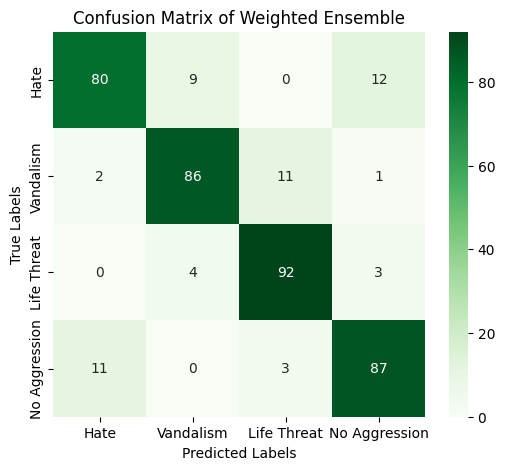


Classification Report:
                precision    recall  f1-score   support

         Hate     0.8602    0.7921    0.8247       101
    Vandalism     0.8687    0.8600    0.8643       100
  Life Threat     0.8679    0.9293    0.8976        99
No Aggression     0.8447    0.8614    0.8529       101

     accuracy                         0.8603       401
    macro avg     0.8604    0.8607    0.8599       401
 weighted avg     0.8603    0.8603    0.8597       401


Accuracy Per Class:
Hate: 0.7921
Vandalism: 0.8600
Life Threat: 0.9293
No Aggression: 0.8614

✅ Overall Test Accuracy: 0.8603
✅ Overall Test Precision: 0.8604
✅ Overall Test Recall: 0.8607
✅ Overall Test F1 Score: 0.8599
✅ Weighted F1 Score: 0.8597
✅ Error Rate: 0.1397


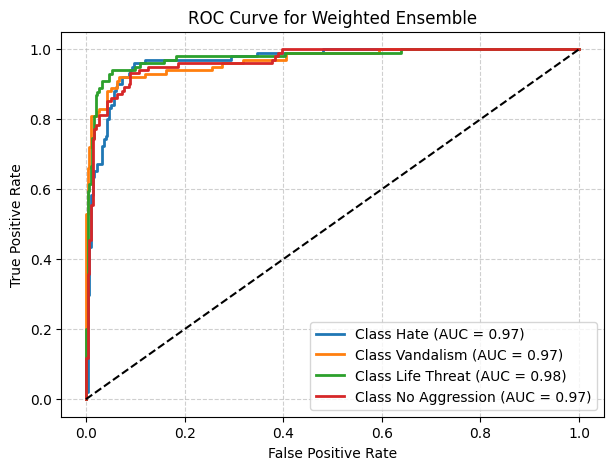

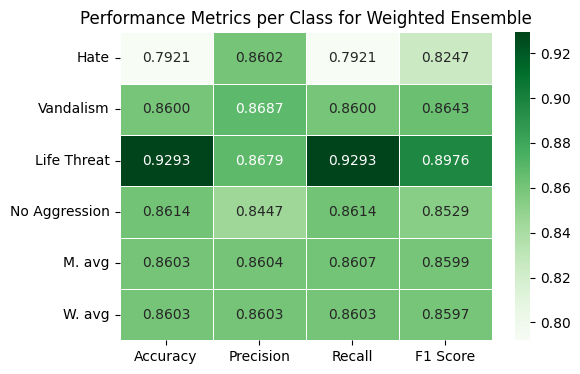

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,
    ConfusionMatrixDisplay, classification_report, roc_curve, auc
)
from sklearn.model_selection import train_test_split

# ✅ Load Predictions from All 4 Models
model_1_df = pd.read_csv("/content/banglabert_baseline_predictions.csv")
model_2_df = pd.read_csv("/content/distilbert_baseline_predictions.csv")
model_3_df = pd.read_csv("/content/mbert_baseline_predictions.csv")
model_4_df = pd.read_csv("/content/xlm_roberta_baseline_predictions.csv")

# ✅ Ensure all have the same true labels
assert np.array_equal(model_1_df["y_true"], model_2_df["y_true"]) and \
       np.array_equal(model_1_df["y_true"], model_3_df["y_true"]) and \
       np.array_equal(model_1_df["y_true"], model_4_df["y_true"]), "Mismatch in true labels!"

# ✅ Extract True Labels and Probabilities
y_true = model_1_df["y_true"]

# Extract probabilities for all classes from the 4 models
model_1_probs = model_1_df.iloc[:, 1:].values
model_2_probs = model_2_df.iloc[:, 1:].values
model_3_probs = model_3_df.iloc[:, 1:].values
model_4_probs = model_4_df.iloc[:, 1:].values

# ✅ Define the weights for each model (can be adjusted)
weights = np.array([0.3, 0.2, 0.25, 0.25])  # Assign your own weights here

# ✅ Compute Weighted Ensemble Probabilities
ensemble_probs = (model_1_probs * weights[0] +
                  model_2_probs * weights[1] +
                  model_3_probs * weights[2] +
                  model_4_probs * weights[3])

# ✅ Compute Final Predictions
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# ✅ Evaluate Performance
ensemble_acc = accuracy_score(y_true, ensemble_preds)
ensemble_f1 = f1_score(y_true, ensemble_preds, average="weighted")
print(f"✅ Weighted Ensemble - Accuracy: {ensemble_acc:.4f}, F1 Score: {ensemble_f1:.4f}")

# ✅ Define class labels
class_labels = ["Hate", "Vandalism", "Life Threat", "No Aggression"]

# ✅ Compute Confusion Matrix
cm = confusion_matrix(y_true, ensemble_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Weighted Ensemble")
plt.show()

# ✅ Generate Classification Report
report = classification_report(y_true, ensemble_preds, target_names=class_labels, digits=4)
print("\nClassification Report:\n", report)

# ✅ Compute Accuracy Per Class
accuracy_per_class = []
for i in range(len(class_labels)):
    class_mask = (y_true == i)
    class_accuracy = accuracy_score(y_true[class_mask], ensemble_preds[class_mask])
    accuracy_per_class.append(class_accuracy)

# ✅ Print Accuracy per Class
print("\nAccuracy Per Class:")
for label, acc in zip(class_labels, accuracy_per_class):
    print(f"{label}: {acc:.4f}")

# ✅ Compute Overall Performance Metrics
precision = precision_score(y_true, ensemble_preds, average='macro')
recall = recall_score(y_true, ensemble_preds, average='macro')
f1 = f1_score(y_true, ensemble_preds, average='macro')
weighted_f1 = f1_score(y_true, ensemble_preds, average='weighted')
error_rate = 1 - ensemble_acc

print(f"\n✅ Overall Test Accuracy: {ensemble_acc:.4f}")
print(f"✅ Overall Test Precision: {precision:.4f}")
print(f"✅ Overall Test Recall: {recall:.4f}")
print(f"✅ Overall Test F1 Score: {f1:.4f}")
print(f"✅ Weighted F1 Score: {weighted_f1:.4f}")
print(f"✅ Error Rate: {error_rate:.4f}")

# ✅ Plot ROC Curve
plt.figure(figsize=(7, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true == i, ensemble_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})', linestyle='-', linewidth=2, color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Weighted Ensemble")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ✅ Compute Metrics Per Class
precision_per_class = precision_score(y_true, ensemble_preds, average=None)
recall_per_class = recall_score(y_true, ensemble_preds, average=None)
f1_per_class = f1_score(y_true, ensemble_preds, average=None)

# ✅ Compute Macro and Weighted Averages
macro_avg = [ensemble_acc, precision, recall, f1]
weighted_avg = [ensemble_acc, precision_score(y_true, ensemble_preds, average='weighted'), recall_score(y_true, ensemble_preds, average='weighted'), weighted_f1]

# ✅ Create and Display 2D Metrics Matrix
metrics_df = pd.DataFrame(
    data=np.vstack([accuracy_per_class, precision_per_class, recall_per_class, f1_per_class]).T,
    index=class_labels,
    columns=["Accuracy", "Precision", "Recall", "F1 Score"]
)
metrics_df.loc["M. avg"] = macro_avg
metrics_df.loc["W. avg"] = weighted_avg

plt.figure(figsize=(6, 4))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="Greens", linewidths=0.5)
plt.title("Performance Metrics per Class for Weighted Ensemble")
plt.show()
